In [1]:
#  Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [2]:
#  Load Data
df = pd.read_csv('../data/complaints.csv')
df = df[['Product', 'Consumer complaint narrative']].dropna()
df.rename(columns={'Consumer complaint narrative': 'Complaint', 'Product': 'Label'}, inplace=True)
df = df[df['Complaint'].str.strip().astype(bool)]

C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_8776\2609706037.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


In [3]:
# Data Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    return text

In [4]:
df['Clean_Complaint'] = df['Complaint'].apply(clean_text)


In [5]:
#  Label Encoding
df['Label'] = df['Label'].astype('category')
df['Label_Code'] = df['Label'].cat.codes

In [6]:
# Train-Test Split
X = df['Clean_Complaint']
y = df['Label_Code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [12]:
# model training
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

c:\Users\Yashwanth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [13]:
# Evaluation
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=df['Label'].cat.categories))

Accuracy: 0.7414796750998578


c:\Users\Yashwanth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yashwanth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
                                                                               precision    recall  f1-score   support

                                                     Bank account or service       0.55      0.19      0.28      2895
                                                 Checking or savings account       0.73      0.84      0.78     27855
                                                               Consumer Loan       0.50      0.14      0.21      1865
                                                                 Credit card       0.54      0.30      0.39     16071
                                                 Credit card or prepaid card       0.55      0.64      0.59     21875
                                                            Credit reporting       0.52      0.16      0.24      6335
                         Credit reporting or other personal consumer reports       0.80      0.81      0.80    213948
Credit reporting, credit repai

c:\Users\Yashwanth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# saving the model
joblib.dump(model, '../model/complaint_classifier.pkl')
joblib.dump(tfidf, '../model/tfidf_vectorizer.pkl')

['../model/tfidf_vectorizer.pkl']

In [17]:
# Top 10 Complaint Categories

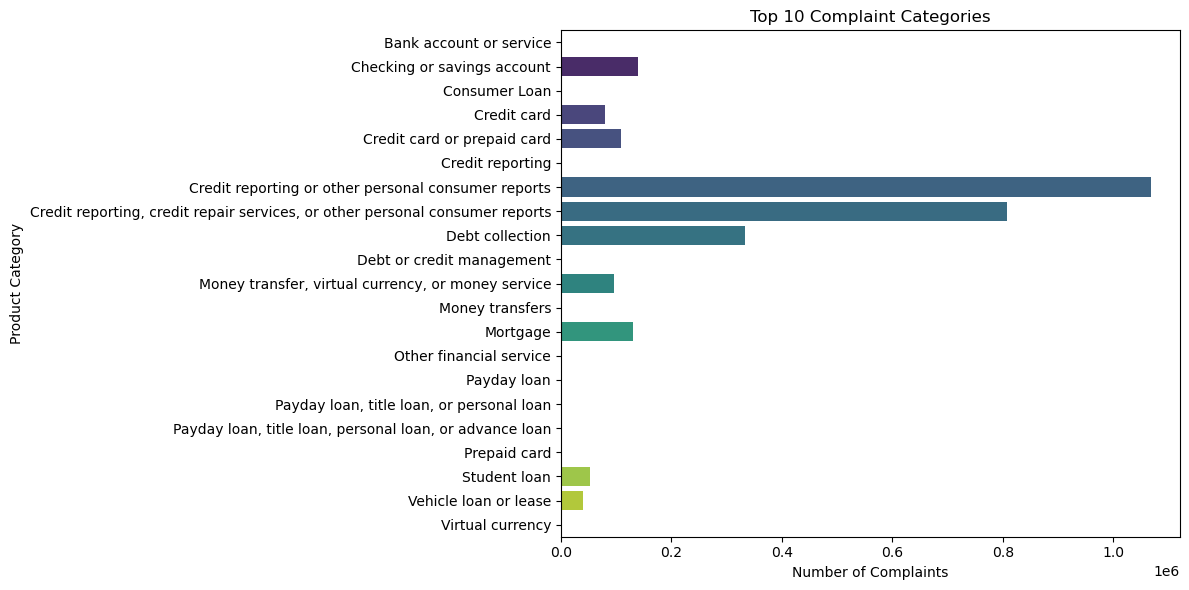

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_labels = df['Label'].value_counts().nlargest(10)
sns.barplot(x=top_labels.values, y=top_labels.index, palette="viridis")
plt.title("Top 10 Complaint Categories")
plt.xlabel("Number of Complaints")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()
